# Project 1
### 8/10 perfect solutions required for full score

These exercises should be done on a computer using Python. 	Please submit a Jupyter-notebook, containing both your code and the report in the same file. Provide properly commented code.

Some of the tasks involve sparse matrices, to obtain efficient code it is preferable to work with sparse matrices using for example the library `sparse` of  `scipy`. In these exercises you are allowed to work with full matrices if you find it easier, but make sure that the comparisons of the various methods in your implementations, e.g. when comparing running times, are fair. Be explicit about these issues in your report.

**You will need an additional Python library for this project:** The library `autograd` will be used to compute the numerical Jacobian. You can install this with `pip install autograd`, `pip3 install autograd` or `conda install autograd` depending on your setup.

In [1]:
import autograd.numpy as np
from autograd import jacobian
import matplotlib.pyplot as plt
import decimal as dec

## 1 - Propagation of rounding errors
The following exercise illustrates the effects of propagation of rounding errors in a numerical algorithm.

 
We want to make a program to approximate the derivative of a differentiable function $f:\mathbb{R} \rightarrow \mathbb{R}$. We use the following approximation called "central difference"

$$f'(x)=\frac{f(x+\Delta x/2)-f(x-\Delta x/2)}{\Delta x}+\mathcal{O}((\Delta x)^2),\qquad f'(x)\approx \frac{f(x+\Delta x/2)-f(x-\Delta x/2)}{\Delta x}.$$

1. Use a Taylor expansion to prove that the error given by this approximation is indeed $\mathcal{O}((\Delta x)^2)$. 



Taylor's Series Theorem:

Assume that $f(x)$ has $k+1$ derivatives in an interval containing the points $x_0$ and $x_0+h$. Then $$f(x_0 + h) = f(x_0) + hf'(x_0) + \frac{h^2}{2}f''(x_0) + ... + \frac{h^k}{k!}f^{(k)}(x_0) + \frac{h^k}{(k+1)!}f^{(k+1)}(\xi)$$ where $\xi$ is some point between $x_0$ and $x_0+h$.

Using Taylor's Seres Theorem, we approximate $f'(x_0)$ ...

## Skriv mer

We now take $f(x)=\exp(-x^2)$, and use the formula above to approximate 

$$\left.\frac{d}{dx}\exp (-x^2)\right|_{x=\frac{\pi}{2}}.$$

2. Make a simple Python program to compute the absolute error of the approximation for decreasing values of $\Delta x$, e.g $\Delta x=\frac{1}{2^k}$ for $k=1,2,\dots , N$, choosing a value of $N$ between $30$ and $40$.
Plot the results (values of $\Delta x$ versus the corresponding absolute error) in a logarithmic scale.



In [2]:
import math

def f(x):
    return np.exp(-x**2)

def appdf(f, x):
    return (f(x + ((1 / (2**k)) / 2)) - f(x + ((1 / (2**k)) / 2))) / (1 / (2**k))

def exactdf(x):
    return -2 * np.exp(-x**2) * x

def absError(f, appdf, exactdf, x):
    xaxis = []
    yaxis = []
    f = f(x)
    for k in range(1, 40):
        yaxis.append(abs(exactdf(f) - appdf(f)))
        xaxis.append(1/(2**k))
    return xaxis, yaxis

axis = np.array(absError(f, appdf, exactdf, math.pi/2))

plt.xscale("log")
plt.plot(axis[0], axis[1])

TypeError: appdf() missing 1 required positional argument: 'x'

You should see in your plot that for very small values of $\Delta x$ the error starts to increase, compromising the convergence of the approximation method. This is due to the propagation of rounding error. The results improve if we can compute our formulae with a higher precision.

3. In this exercise you should learn how to use the library `decimal` in Python in order to perform the calculations of the previous experiment with higher precision. 
Consider the same parameters used in the previous experiment ($\Delta x=\frac{1}{2^k}$ for $k=1,2,\dots , N$ and same $N$ as above), increase the level of precision (look up `getcontext().prec` in the `decimal` library) and produce a plot which does not show the effects of propagation of rounding errors.

In [3]:
# Your code

# 2 - Newton's method

In this exercise, we will make use of the `autograd` package. As we have done at the start of this noteobook, when using this package you must `import` Numpy using `autograd.numpy`. We use the `jacobian` function, which approximates the jacobian of functions between Numpy arrays. See the following example.

$$ F(x_1, x_2) = (x_1 + x_2, x_1x_2)$$

In [4]:
def F_0(x):
    return np.array([x[0] + x[1], x[1]*x[0]])

# Computing the numerical Jacobian
DF = jacobian(F_0)
# Testing our function
x = np.array([3.0, 1.0])
print(DF(x))

[[1. 1.]
 [1. 3.]]




1. You are given the following function:
$$
    F(x_1, x_2) = (x_1 + x_1x_2 - 1, x_1^2 + x_2 + 3)
$$
  - Using the package `autograd` for automatic differentiation to compute Jacobians, create a function `newton` which implements Newton's method for systems of nonlinear equations $F(\mathbf{x})=0$.
  - Apply the method to $F$. These numerical experiments should give evidence that Newton's method converges for these two problems.
  - Choose an initial value close enough in $\infty$-norm to one solution of the system. Plot the values of $\|\mathbf{x}^{k+1}-\mathbf{x}^k\|_{\infty}$ and $\|F(\mathbf{x}_k)\|_{\infty}$ for each iteration  $k=0,1,\dots, K-1$ where $K$ is the total number of iterations (choose $K$ large enough to make a detailed plot). Use a semi-logarithmic scale on the y-axis (`semilogy` in matplotlib). 
  - Your answer is your code and a pair of figures with comments in text about what the figures show and what they can tell you about the convergence.

In [131]:
from numpy import linalg

def newton(F, x, maxIt):
    xdiffnorm = []
    Fnorm = []
    J = jacobian(F)
    for i in range(0, maxIt - 1):
        z = x - np.dot(np.linalg.inv(J(x)), F(x))
        xdiffnorm.append(linalg.norm((z - x), np.inf))
        Fnorm.append(linalg.norm(F(x), np.inf))
        x = z
    return xdiffnorm, Fnorm

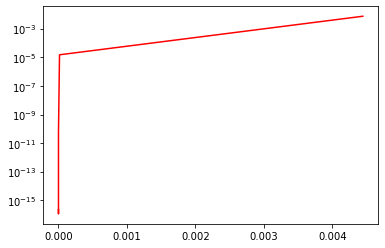

In [132]:
def F(x):
    return np.array([x[0] + x[1] * x[0] - 1, x[0]**2 + x[1] + 3])

x = np.array([-0.45, -3.21])

axis = np.array(newton(F, x, 1000))

plt.semilogy(axis[0], axis[1], color = "red")
plt.show()

2. Use the implemented Newton method and implement a stopping criterion.
As stopping criterion, you should use a maximum number of iterations as well as two tolerances $TOL_1$ and $TOL_2$ such that the iteration is stopped whenever $\|F(\mathbf{x}^k)\|_{\infty}\le TOL_1$ and $\|\mathbf{x}^{k+1}-\mathbf{x}^k\|_{\infty}\le TOL_2$. 
Provide numerical evidence that your code works as it should by  printing the values $\|F(\mathbf{x}^k)\|_{\infty}$ for each iteration , and making a plot of $\|F(\mathbf{x}^k)\|_{\infty}$, $\|\mathbf{x}^{k+1}-\mathbf{x}^k\|_{\infty}$, for all $k$.



In [133]:
from numpy import linalg

def newton(F, x, maxIt, TOL1, TOL2):
    xdiffnorm = []
    Fnorm = []
    J = jacobian(F)
    for i in range(0, maxIt - 1):
        z = x - np.dot(np.linalg.inv(J(x)), F(x))
        xdiffnorm.append(linalg.norm((z - x), np.inf))
        Fnorm.append(linalg.norm(F(x), np.inf))
        Finf = linalg.norm((z - x), np.inf)
        xinf = linalg.norm(F(x), np.inf)
        if (Finf <= TOL1) and (xinf <= TOL2):
            print("Finf <= TOL1 og xinf <= TOL2")
            print(Finf)
            break
        x = z
    return xdiffnorm, Fnorm

Finf <= TOL1 og xinf <= TOL2
1.4937100285994376e-05


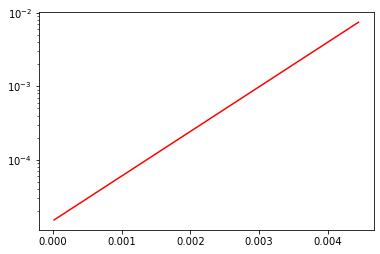

In [134]:
def F(x):
    return np.array([x[0] + x[1] * x[0] - 1, x[0]**2 + x[1] + 3])

x = np.array([-0.45, -3.21])

axis = np.array(newton(F, x, 1000, 0.001, 0.001))

plt.semilogy(axis[0], axis[1], color = "red")
plt.show()

3. Use newtons method to make a function that calculates a n-th root of a matrix $A$. That is, a function that solves $X^n = A$.

- Confirm numerically that your implementation is correct.

**Hint**. Can you reinterpret the function $F(X) = X^n - A$ as a function between arrays? 

In [135]:
def F(X, n, A):
    return np.array([X**n - A])

# print(J(np.array([[3, 3], [3, 3]]), 3, np.array([[3, 3], [3, 3]])))
# print(F(np.array([[3, 3], [3, 3]]), 3, np.array([[3, 3], [3, 3]])))

def nthroot(F, Tol, A, X, n, maxIt):
    x = abs(F(X, n, A))
    J = jacobian(F)
    for i in range(0, maxIt):
        return
    return

4. Think of a good way of verifying numerically that the convergence of the Newton iteration is quadratic. 
- Your answer is the code that does the verification, the evidence it produces and an explanation of why it is evidence for quadratic convergence.

**Hint**. You should consider a problem for which you know the solution or alternatively generate a reference solution (i.e. an approximation with *very* high accuracy). Use the definition of quadratic convergence. You can also compute the jacobian exactly (by hand) to eliminate the error from that part of the process.

In [5]:
from sympy import *
x = symbols('x')
c = limit((1+1/x)**x, x, oo)
print(r)

E


# 3 Linear systems -Poisson equation-
We are going to numerically solve the following equation for $(x,y)\in [0,1]^2$ with the Dirichlet boundary condition:
	$$
	u_{xx} + u_{yy}= f, \text{and} \;\; u=0 {\text{ for boundary}} 
	$$
    where $u_{xx}$ and $u_{yy}$ are the second order partial derivatives of the unknown function $u(x,y)$, and $f(x,y)$ is a given function. We discretize the above problem on the regular equispaced grid: $x_i=\frac{i}{n+1}$,  and $y_j=\frac{j}{n+1}$  with $i,j=1,...,n$ ($0$ and $n+1$ correspond to the boundary). 
    We use the following finite difference approximation
    $$u_{xx}(x_i,y_j)+u_{yy}(x_i,y_j)\approx\frac{u(x_{i+1},y_j)-2u(x_{i},y_j)+u(x_{i-1},y_j)}{(\Delta x)^2} +\frac{u(x_i,y_{j+1})-2u(x_{i},y_{j})+u(x_i,y_{j-1})}{(\Delta y)^2}.$$
Note that we have $\Delta x=\Delta y=1/(n+1)$ here. Thus we consider the following linear system to approximate the above problem 
	$$
	\frac{1}{(\Delta x)^2}A \mathbf{u}  = \mathbf{f},
	$$
where the left hand side is a finite-difference discretization of $u_{xx} + u_{yy}$, the matrix $A$ is implemented in the code below, and $\mathbf{f}$ is the discretized vector of function $\mathbf{f}=(f(x_1,y_1),f(x_2,y_1),...,f(x_n,y_1),f(x_1,y_2),...,f(x_n,y_2),....,f(x_n,y_n))^{\top}$, as well as $\mathbf{u}=(u(x_1,y_1),u(x_2,y_1),...,u(x_n,y_1),u(x_1,y_2),...,u(x_n,y_2),....,u(x_n,y_n))^{\top}$. 

In [137]:
from scipy import sparse
from scipy import linalg
from scipy.sparse.linalg import eigs

# Creating the matrix A.
nx, ny = 10, 10
m = nx*ny # number of x_i, y_i pairs
main_diag = np.ones(m)*-4.0
side_diag = np.ones(m-1)
side_diag[np.arange(1,m)%nx==0] = 0
side_diag2 = np.ones(m-nx)
diagonals = [main_diag,side_diag,side_diag,side_diag2,side_diag2]
Amatrix = sparse.diags(diagonals, [0, -1, 1,nx,-(nx)])

print(Amatrix @ np.identity(m))

[[-4.  1.  0. ...  0.  0.  0.]
 [ 1. -4.  1. ...  0.  0.  0.]
 [ 0.  1. -4. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -4.  1.  0.]
 [ 0.  0.  0. ...  1. -4.  1.]
 [ 0.  0.  0. ...  0.  1. -4.]]


We solve the linear system 
	$$
	A \mathbf{u}  = (\Delta x)^2 \mathbf{f},
	$$
    in the following.
For convenience, we introduce the following notation:

- $A_d$ the diagonal part of $A$,
- $A_l$ is **minus** the strictly lower-triangular part of $A$,
- $A_u$ is **minus** the strictly upper-triangular part of $A$,

with this notation, $A = A_d - A_l - A_u$.

We will now approximate the solution of this linear system using three different iterative methods of the type 
	$$
		M \mathbf{u}^{(k+1)} = N \mathbf{u}^{(k)}+(\Delta x)^2\mathbf{f},
	$$
	where $A = M - N$ with $|M|\ne0$. These methods are aslo known as splitting methods and  each choice of $M$ (and $N=M-A$) determines a different method.  We will use the following three iterative methods to calculate approximate solutions to $\mathbf{u}$:

a) Jacobi ($M = A_d$).

b) Forward Gauss-Seidel ($M = A_d-A_l$).

c) Successive over relaxation ($M = A_d-\omega A_l$, where you can choose the value of $\omega$).

1. Create a function that implements the above iterative method. This function should take as input the matrix `A` and `M` such that you can use this function for all three methods above, and outputs the solution to the linear system `u`. Use the three methods to find the solution to the linear system with `n=nx=ny=10`, the initial guess $\mathbf{u}^{(0)}=(1,1,...,1)^\top
$, and the function $f(x,y)=\exp(-10(x-1/2)^2-10(y-1/2)^2)$. Confirm that what you obtain is indeed a solution numerically. Do not forget to multiply $(\Delta x)^2$ with $\mathbf{f}$.


In [144]:
def jacobi(Amatrix, u, dx, f, maxIt):
    M = (-np.diag(np.diag(Amatrix @ np.identity(m))))
    N = M - (Amatrix @ np.identity(m))
    a = u
    for i in range(0, maxIt):
        v = np.linalg.inv(M) * N * a + np.linalg.inv(M) * dx * f
        a = v
    return a

def fGS(Amatrix, u, dx, f, MaxIt):
    M = (-np.diag(np.diag(Amatrix @ np.identity(m)))) - (-np.tril(Amatrix @ np.identity(m), k=-1))
    N = M - (Amatrix @ np.identity(m))
    b = u
    for j in range(0, maxIt):
        v = np.linalg.inv(M) * N * b + np.linalg.inv(M) * dx * f
        b = v
    return b

def SOR(Amatrix, u, dx, f, maxIt, w):
    M = (-np.diag(np.diag(Amatrix @ np.identity(m)))) - w * (-np.tril(Amatrix @ np.identity(m), k=-1))
    N = M - (Amatrix @ np.identity(m))
    c = u
    for k in range(0, maxIt):
        v = np.linalg.inv(M) * N * c + np.linalg.inv(M) * dx * f
        c = v
    return c

def iterMethod(Amatrix, u, f, maxIt, w):
    dx = (1/11)**2
    jacobi(Amatrix, u, dx, f, maxIt)
    fGS(Amatrix, u, dx, f, maxIt)
    SOR(Amatrix, u, dx, f, maxIt, w)
    return a, b, c

In [145]:
from scipy import sparse
from scipy import linalg
from scipy.sparse.linalg import eigs

nx, ny = 10, 10
m = nx*ny
main_diag = np.ones(m)*-4.0
side_diag = np.ones(m-1)
side_diag[np.arange(1,m)%nx==0] = 0
side_diag2 = np.ones(m-nx)
diagonals = [main_diag,side_diag,side_diag,side_diag2,side_diag2]
Amatrix = sparse.diags(diagonals, [0, -1, 1,nx,-(nx)])

def f(x):
    return np.array([np.exp(-10 * (x[0] - 1/2)**2 - 10 * (x[1] - 1/2)**2)])

# M = (-np.diag(np.diag(Amatrix @ np.identity(m)))) - (-np.tril(Amatrix @ np.identity(m), k=-1))
# print(M)
u = np.array([1,1,1,1,1,1,1,1,1,1]).T

iterMethod(Amatrix, u, f, 100, 2)

ValueError: operands could not be broadcast together with shapes (100,100) (10,) 

2. Consider the residual vector $\mathbf{r}^k:=\mathbf{f}-A\mathbf{u}^k$. We wish to compare the speed of convergence for each of the methods above. 
   - Produce a semi-log plot of the  $2$-norm of the relative residual  $\frac{\|\mathbf{r}^k\|_2}{\|\mathbf{r}^0\|_2}$ versus the number of iterations. Plot all the methods in the same plot for comparison. 
   - Try choosing different values of $\omega$ in the SOR method.

In [28]:
# Your code